In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d_2

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 600; Features: 2; Clusters: 2    3
dtype: int64
          0         1
0  0.297720  1.884057
1  0.582032  3.336933
2  0.414665  3.918128
3  0.649395  2.436345
4  0.347310  2.367457


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


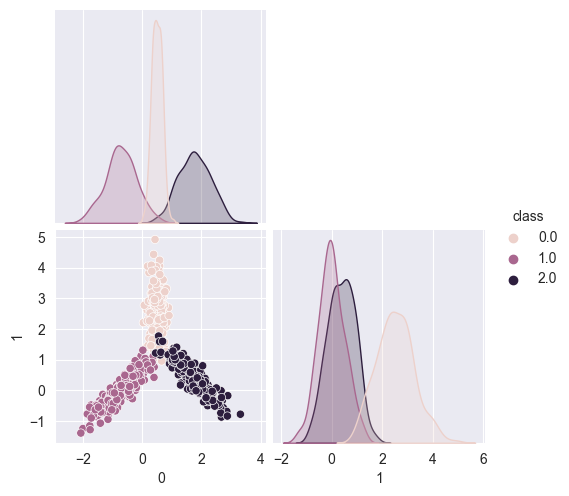

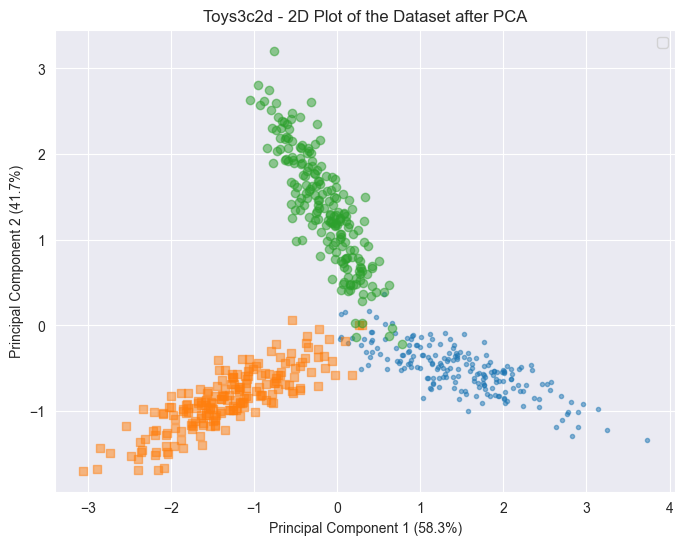

In [2]:
# fetch dataset 
df = load_toys3c2d_2()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Toys3c2d", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(1):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [3.839623520496493]
ARI values: [0.9259715290996613]
NS values: [1.4072872840099921]
NMI values: [0.9048866033769425]


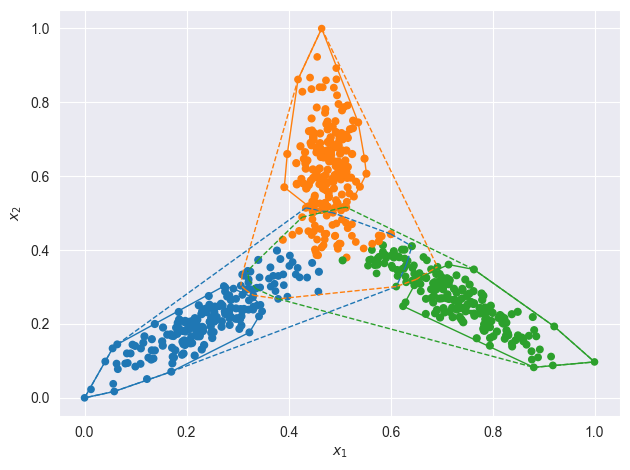

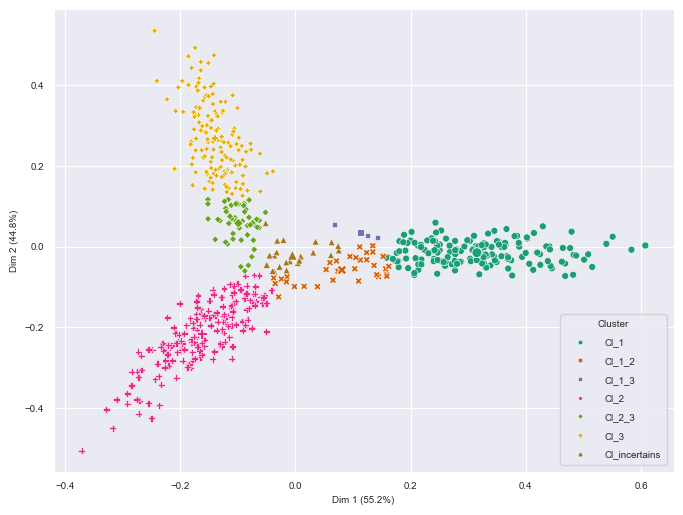

In [4]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [5]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.3855264682865592, 0.3855264682865592, 0.38552646828655934, 0.38552646828655934, 0.3855264682865603, 0.3855264682865603, 0.3855264682865608, 0.3855264682865611, 0.3855264682865611, 0.3855264682865611]
ARI values: [0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855, 0.4941299211873855]
NS values: [1.824627483703625, 1.824627483703625, 1.7898013677082896, 1.7898013677082896, 1.89550653506043, 1.89550653506043, 1.872727596238078, 1.8485523468914247, 1.8485523468914247, 1.8485523468914247]
NMI values: [0.5162855661796499, 0.5162855661796499, 0.5162855661796499, 0.5162855661796499, 0.5162855661796499, 0.5162855661796499, 0.51628556617965, 0.5162855661796499, 0.5162855661796499, 0.5162855661796499]


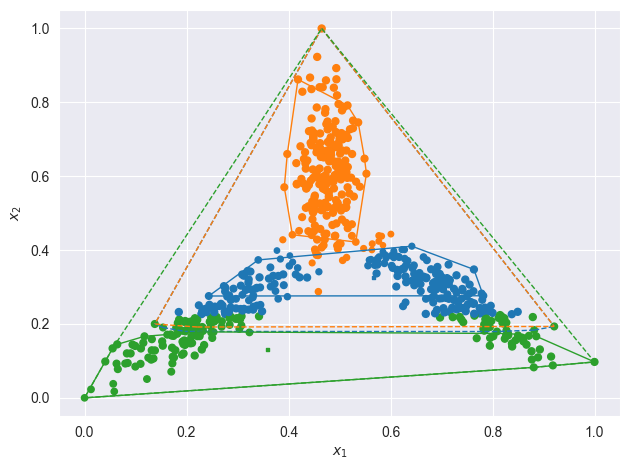

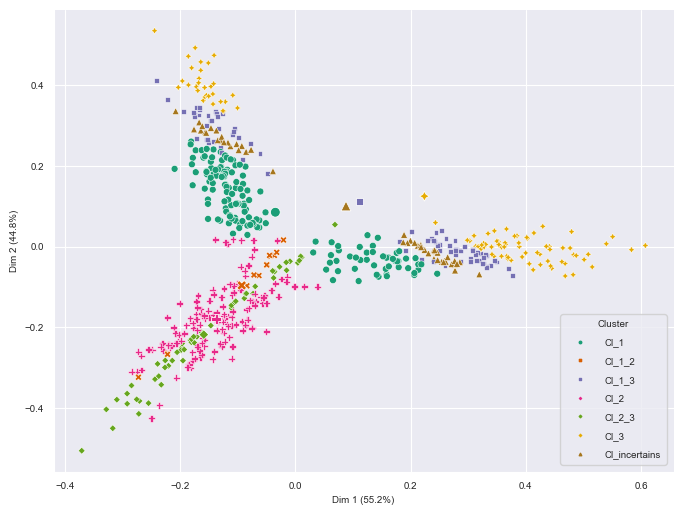

In [6]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [9]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.7973708465171523, 0.7973708474391097, 0.7973708534074789, 0.7973708766815206, 0.7973708854742521, 0.7973714991729366, 0.7973715260237662, 0.7973716215563467, 0.7973716752950946, 0.7973720273246572]
ARI values: [0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49297144692597383, 0.49594089363471955, 0.49297144692597383, 0.49594089363471955]
NMI values: [0.5096928928126051, 0.5096928928126051, 0.5096928928126051, 0.5096928928126052, 0.5096928928126051, 0.5096928928126051, 0.5096928928126052, 0.5116444138504521, 0.5096928928126051, 0.5116444138504521]


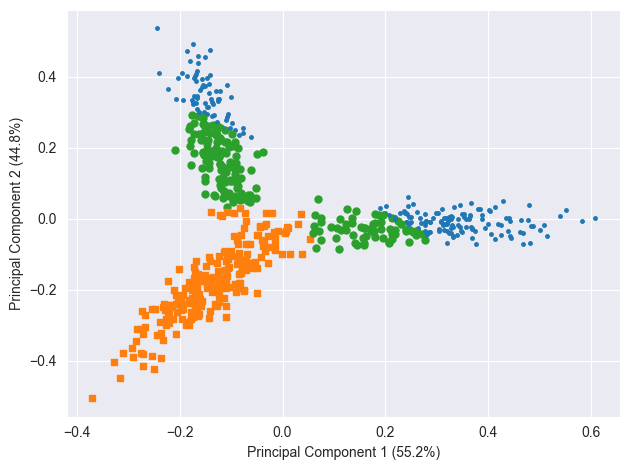

In [10]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [19]:
# %%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=2.6, verbose=True)
    wang_models = np.append(wang_models, model)

Dataset includes 600 instances, and 2 features
Initial centers: [[0.71733537 0.27593178]
 [0.24559882 0.21439422]
 [0.47649802 0.60994962]]
Initial weights: [0.5 0.5]
[1, 0.07208546637848204]]
Final initial weights: [0.49987531 0.49896803]
[1, 1.6708372656081347]
[2, 1.6689635708611754]
[3, 1.6688497079369893]
Dataset includes 600 instances, and 2 features
Initial centers: [[0.71733537 0.27593178]
 [0.24559882 0.21439422]
 [0.47649802 0.60994962]]
Initial weights: [0.5 0.5]
[1, 0.07208546637848204]]
Final initial weights: [0.49987531 0.49896803]
[1, 1.6708372656081347]
[2, 1.6689635708611754]
[3, 1.6688497079369893]


J values: [1.6688497079369893, 1.6688497079369893]
ARI values: [0.9259685743050123, 0.9259685743050123]
NMI values: [0.8962032422498966, 0.8962032422498966]


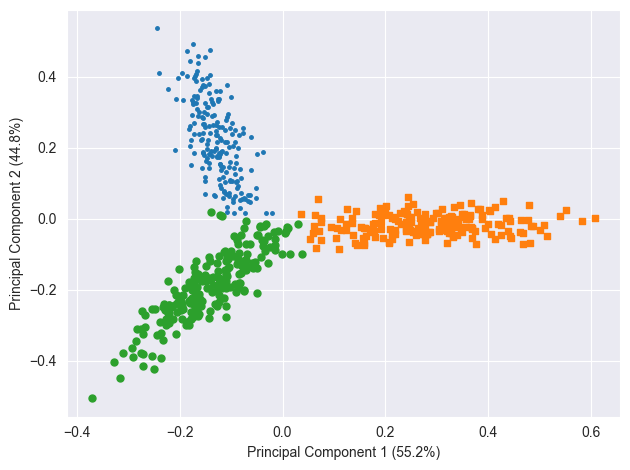

In [20]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [11]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

J values: [9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216, 9.220770090008216]
ARI values: [0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652]
NMI values: [0.8740526835751566, 0.8740526835751569, 0.8740526835751566, 0.8740526835751569, 0.8740526835751566, 0.8740526835751566, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569]


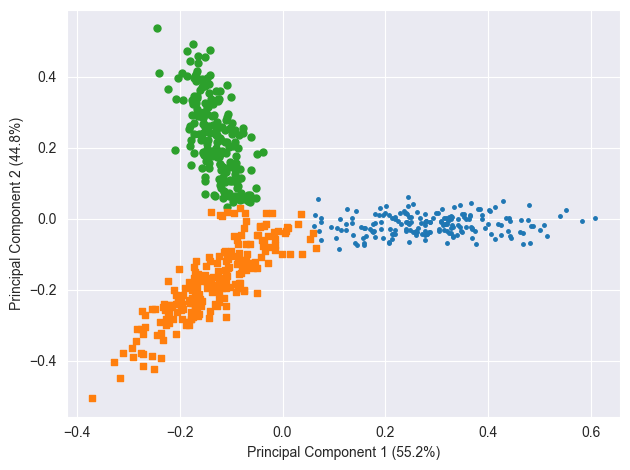

In [12]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [13]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

J values: [1.1473280806211208, 1.1473280806211208, 1.1473280806211208, 1.147328080621121, 1.147328080621121, 1.147328080621121, 1.1473280806211212, 1.1473280806211212, 1.1473280806211212, 1.1473280806211212]
ARI values: [0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339, 0.7728098742076339]
NMI values: [0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361, 0.7730785563644361]


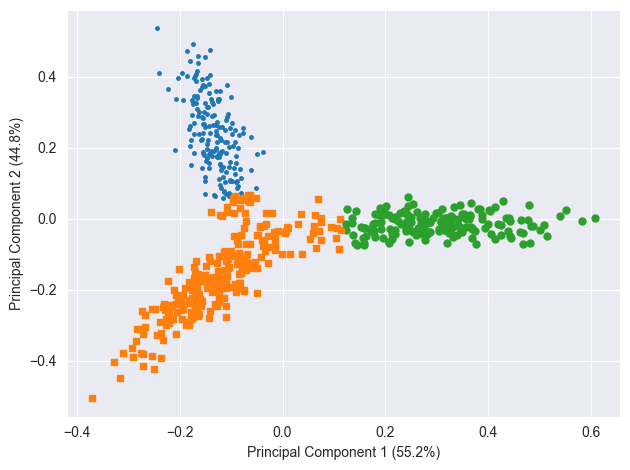

In [14]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [15]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [1.6257438108652613, 1.6257438108652613, 1.6257438108652615, 1.6257438108652615, 1.6257438108652615, 1.6257438108652615, 1.6257438108652615, 1.6257438108652615, 1.625743810865262, 1.625743810865262]
ARI values: [0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652, 0.8962610251424652]
NMI values: [0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751569, 0.8740526835751566, 0.8740526835751569, 0.8740526835751566, 0.8740526835751566, 0.8740526835751566]


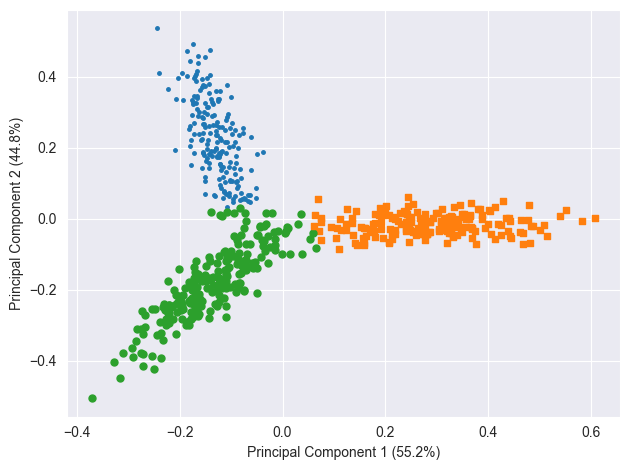

In [16]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [17]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [32.78763944809323, 32.78763944809323, 32.78763944809323, 32.78763944809323, 32.78763944809323, 32.78763944809323, 32.787639448093245, 32.787639448093245, 32.787639448093245, 32.787639448093245]
ARI values: [0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805, 0.8431815692528805]
NMI values: [0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.8275011662778119, 0.827501166277812, 0.827501166277812]


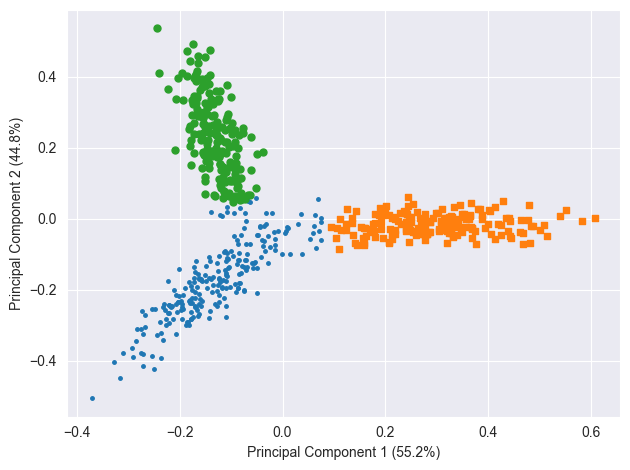

In [18]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)